In [1]:
import sys
import os

# moce two directories up and make that current directory
os.chdir("../..")
# print current directory
print(os.getcwd())

/Users/chinmayshrivastava/Documents/GitHub/RepoStateManager


In [2]:
from modules.tables.TextTableReader import TextTableReader

tr = TextTableReader(
    "tests/TableTransformer/test1.pdf",
)

/Users/chinmayshrivastava/Documents/GitHub/RepoStateManager/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/1 [00:00<?, ?it/s]INFO:root:ImageReader initialized.
INFO:root:torch.Size([1, 3, 800, 618])
INFO:root:ImageReader transformed.
100%|██████████| 1/1 [00:00<00:00, 12.52it/s]
INFO:root:PDFParser initialized.
INFO:root:TextTableReader initialized.


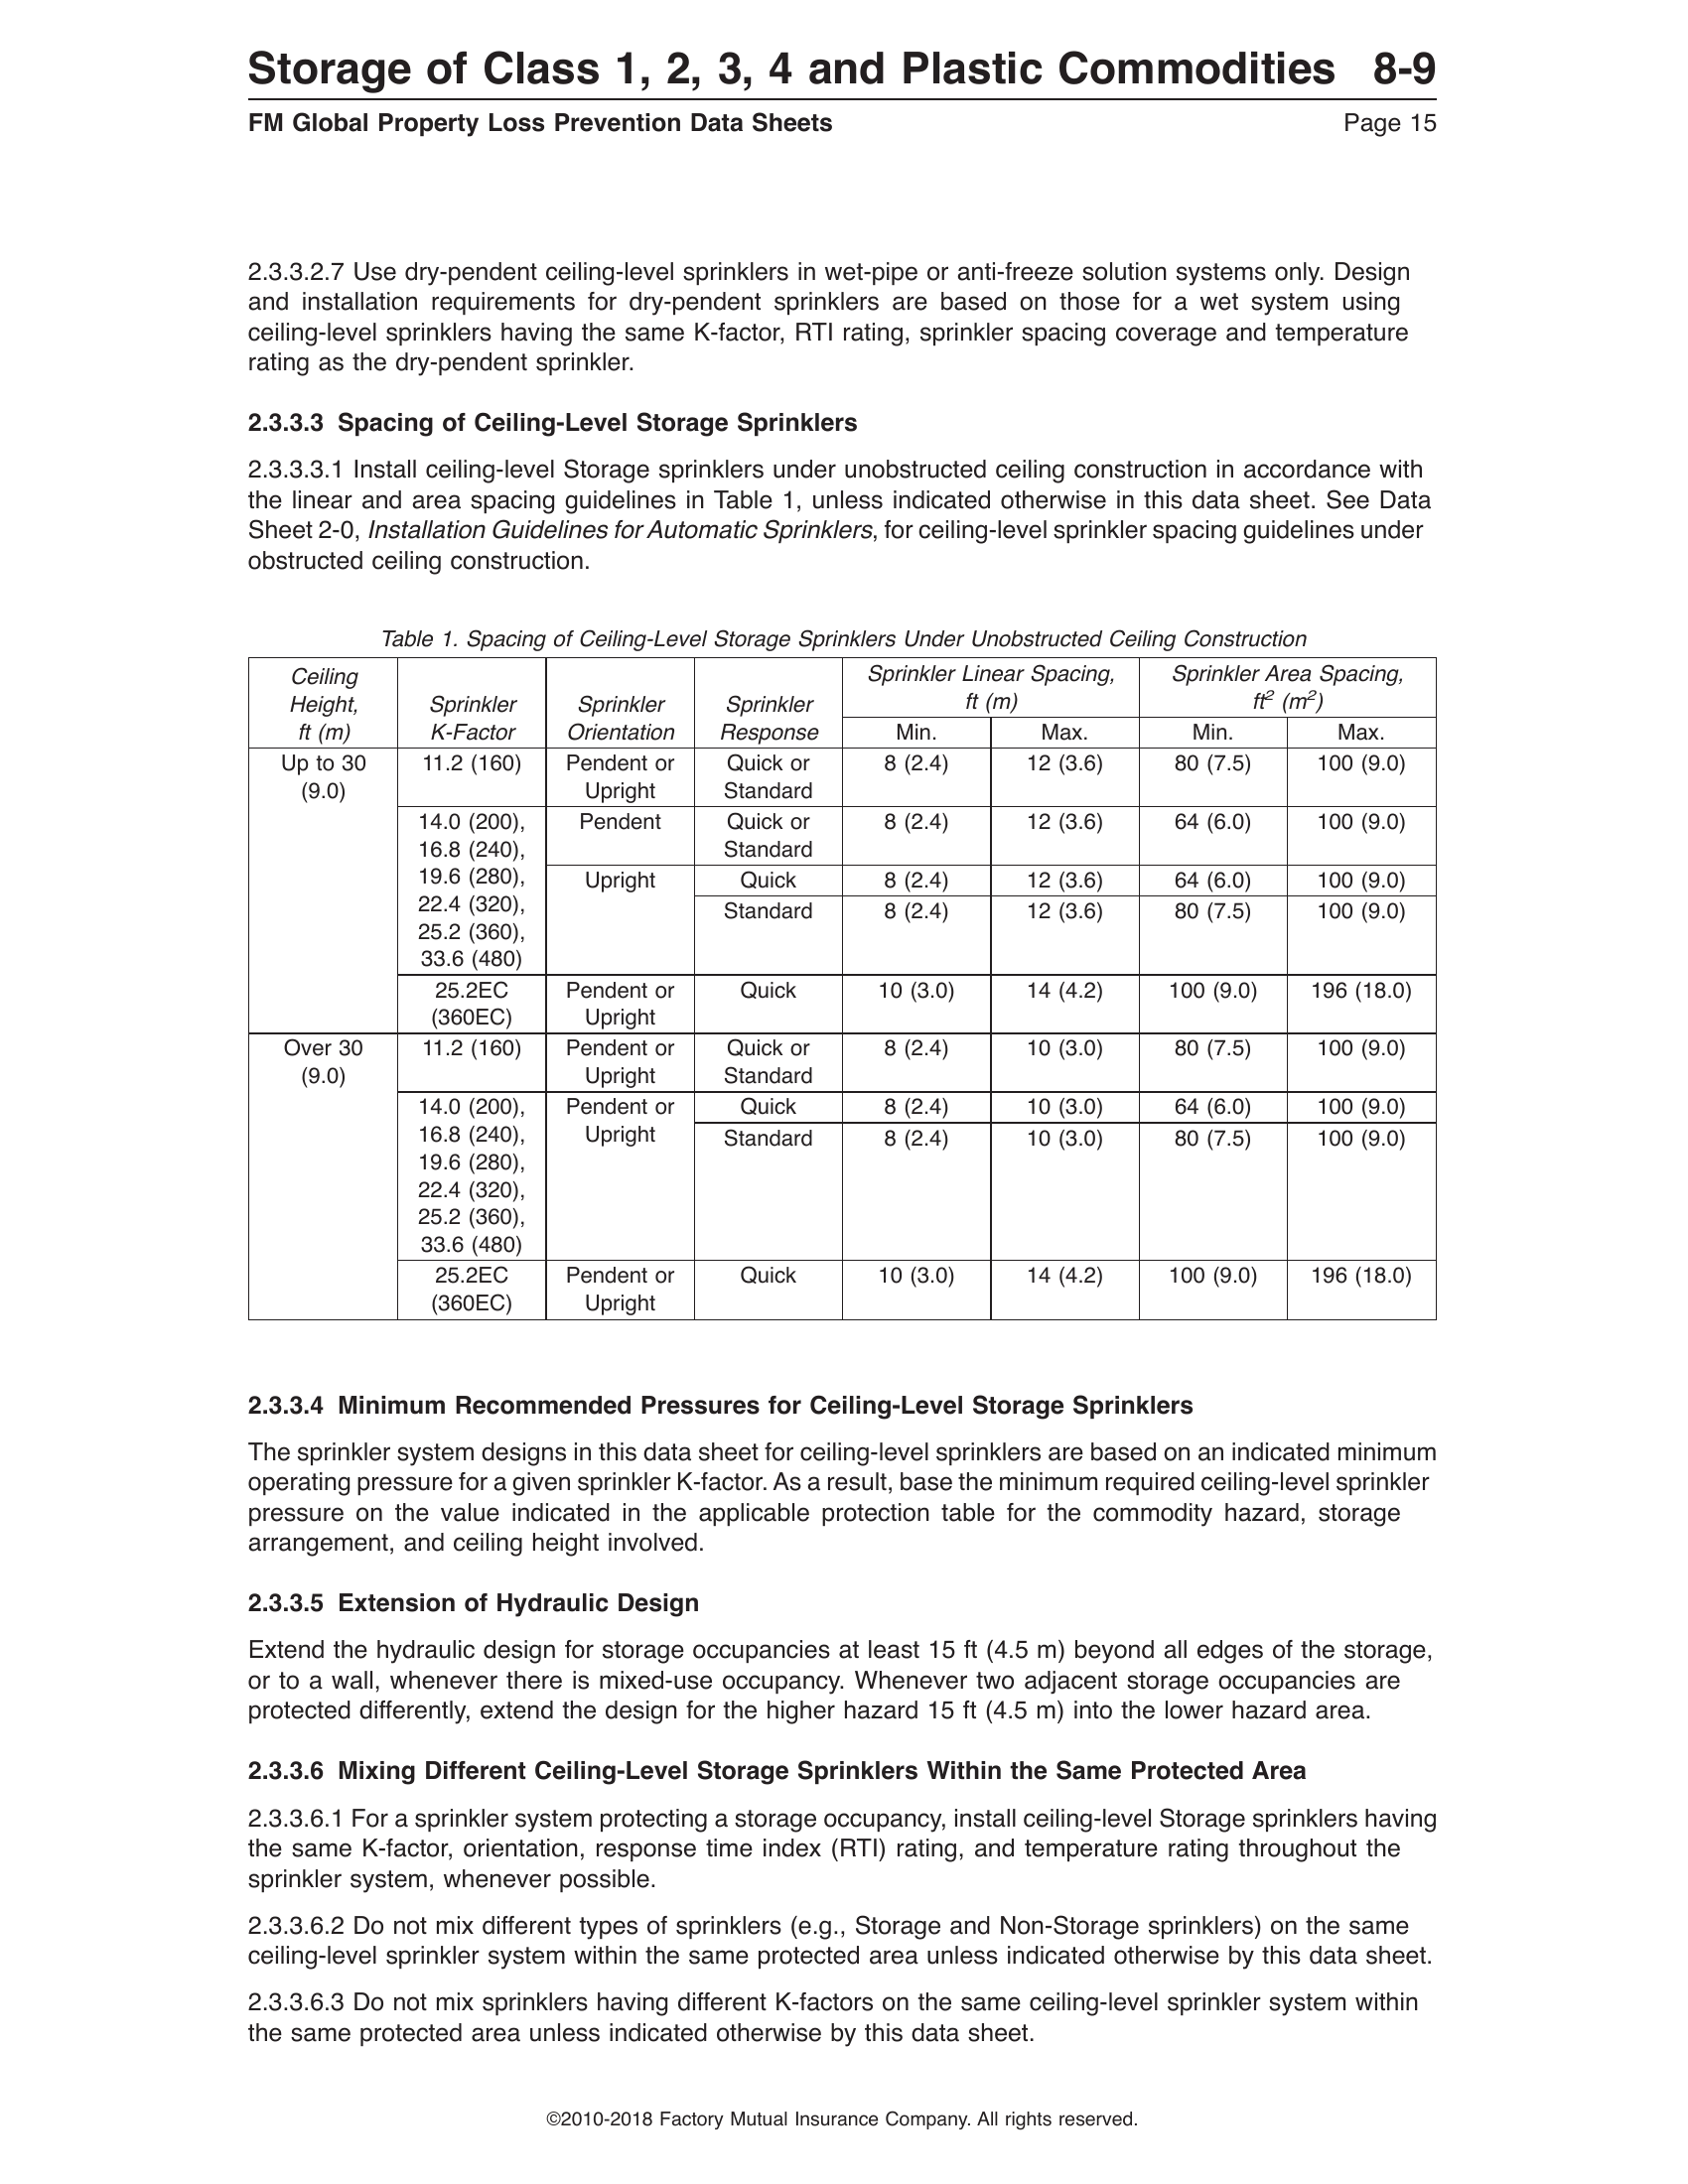

In [8]:
img = tr.pdf_images[0].image
img

In [3]:
tr.extract_all_data()

  0%|          | 0/1 [00:00<?, ?it/s]INFO:root:Extracting tables from page 1...
2024-01-28T17:16:34 - INFO - Processing page-1
INFO:camelot:Processing page-1
100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
INFO:root:Extracted all data from tests/TableTransformer/test1.pdf.


In [4]:
df = tr.tables_by_page_data[0][0]['dataframe']
df

,0,1,2,3,4,5,6,7
0,"Ceiling\nHeight,\nft (m)",Sprinkler\nK-Factor,Sprinkler\nOrientation,Sprinkler\nResponse,"Sprinkler Linear Spacing,\nft\n(m)",,"Sprinkler Area Spacing,\nft2 (m2)",
1,,,,,Min.,Max.,Min.,Max.
2,Up to 30\n(9.0),11.2 (160),Pendent or\nUpright,Quick or\nStandard,8 (2.4),12 (3.6),80 (7.5),100 (9.0)
3,,"14.0 (200),\n16.8 (240),\n19.6 (280),\n22.4 (3...",Pendent,Quick or\nStandard,8 (2.4),12 (3.6),64 (6.0),100 (9.0)
4,,,Upright,Quick,8 (2.4),12 (3.6),64 (6.0),100 (9.0)
5,,,,Standard,8 (2.4),12 (3.6),80 (7.5),100 (9.0)
6,,25.2EC\n(360EC),Pendent or\nUpright,Quick,10 (3.0),14 (4.2),100 (9.0),196 (18.0)
7,Over 30\n(9.0),11.2 (160),Pendent or\nUpright,Quick or\nStandard,8 (2.4),10 (3.0),80 (7.5),100 (9.0)
8,,"14.0 (200),\n16.8 (240),\n19.6 (280),\n22.4 (3...",Pendent or\nUpright,Quick,8 (2.4),10 (3.0),64 (6.0),100 (9.0)
9,,,,Standard,8 (2.4),10 (3.0),80 (7.5),100 (9.0)


In [5]:
from modules.tables.conversion.df2graph import Dataframe2Graph

dfg = Dataframe2Graph(df)

INFO:root:Dataframe2Graph initialized.


col_tracker shape: (11, 8)


In [6]:
dfg.get_graph()

INFO:root:subtables: [0, 1, 2, 3, 4, 4, 6, 6]
INFO:root:subtables: [None, None, None, None, 4, 5, 6, 7]
INFO:root:subtables: [0, 1, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, 1, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, None, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, None, None, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, 1, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [0, 1, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, 1, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, None, None, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, 1, 2, 3, 4, 5, 6, 7]


In [7]:
dfg._init_rows()
dfg._init_columns()
dfg._populate_col_tracker()

INFO:root:subtables: [0, 1, 2, 3, 4, 4, 6, 6]
INFO:root:subtables: [None, None, None, None, 4, 5, 6, 7]
INFO:root:subtables: [0, 1, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, 1, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, None, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, None, None, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, 1, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [0, 1, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, 1, 2, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, None, None, 3, 4, 5, 6, 7]
INFO:root:subtables: [None, 1, 2, 3, 4, 5, 6, 7]


array([[ 0.,  1.,  2.,  3.,  4.,  4.,  6.,  6.],
       [nan, nan, nan, nan,  4.,  5.,  6.,  7.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [nan, nan,  2.,  3.,  4.,  5.,  6.,  7.],
       [nan, nan, nan,  3.,  4.,  5.,  6.,  7.],
       [nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [nan, nan, nan,  3.,  4.,  5.,  6.,  7.],
       [nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.]])

In [9]:
dfg._get_connection_chains_column()

[[0.0, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan],
 [1.0, nan, 1.0, 1.0, nan, nan, 1.0, 1.0, 1.0, nan, 1.0],
 [2.0, nan, 2.0, 2.0, 2.0, nan, 2.0, 2.0, 2.0, nan, 2.0],
 [3.0, nan, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0],
 [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0],
 [4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0],
 [6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]]

In [10]:
dfg._update_graph()

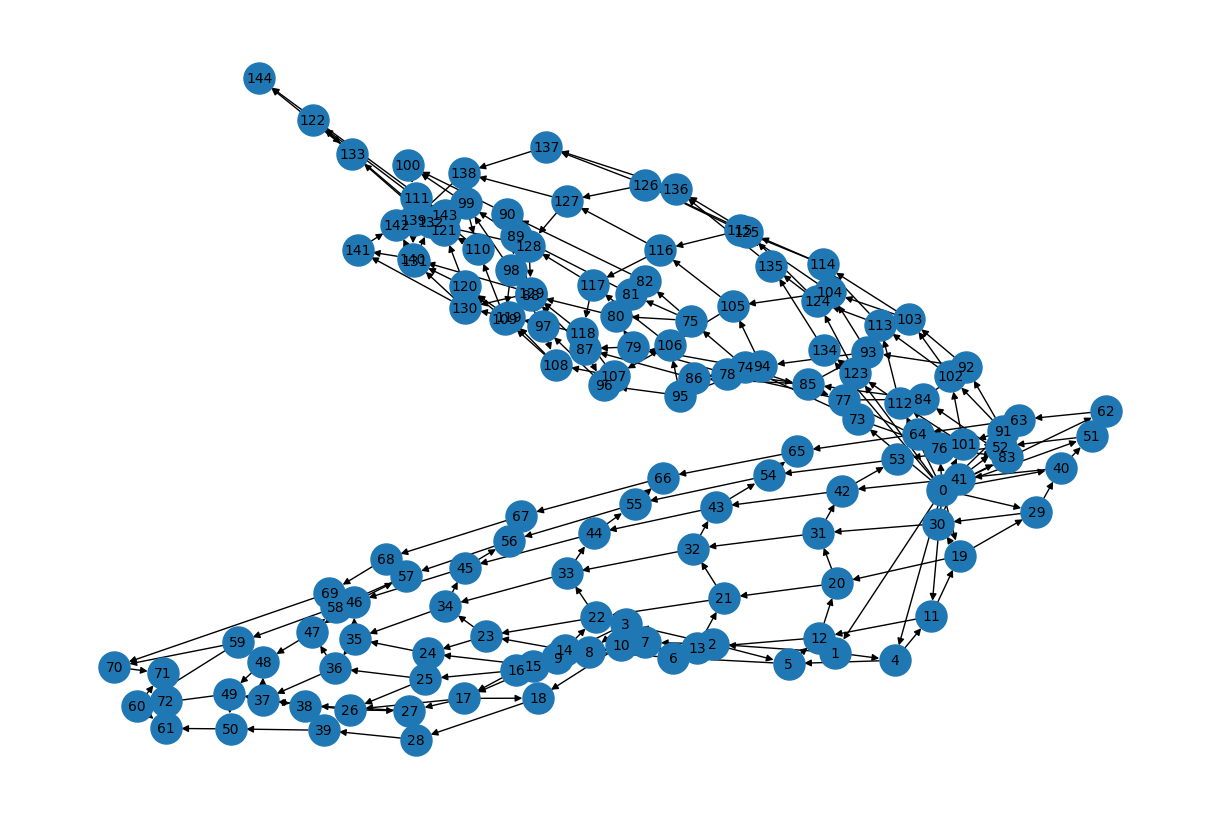

In [15]:
dfg.visualize()

In [12]:
dfg.cell_uid_tracker

array([[ 73.,  76.,  83.,  91., 101., 112., 123., 134.],
       [ nan,  nan,  nan,  nan, 102., 113., 124., 135.],
       [ 74.,  77.,  84.,  92., 103., 114., 125., 136.],
       [ nan,  78.,  85.,  93., 104., 115., 126., 137.],
       [ nan,  nan,  86.,  94., 105., 116., 127., 138.],
       [ nan,  nan,  nan,  95., 106., 117., 128., 139.],
       [ nan,  79.,  87.,  96., 107., 118., 129., 140.],
       [ 75.,  80.,  88.,  97., 108., 119., 130., 141.],
       [ nan,  81.,  89.,  98., 109., 120., 131., 142.],
       [ nan,  nan,  nan,  99., 110., 121., 132., 143.],
       [ nan,  82.,  90., 100., 111., 122., 133., 144.]])

In [13]:
dfg.meta_columns

[0, 1, 2, 3]

In [14]:
dfg.meta_rows

[0, 1]